<a href="https://colab.research.google.com/github/MuhamadRizky101/Data/blob/main/UAS_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

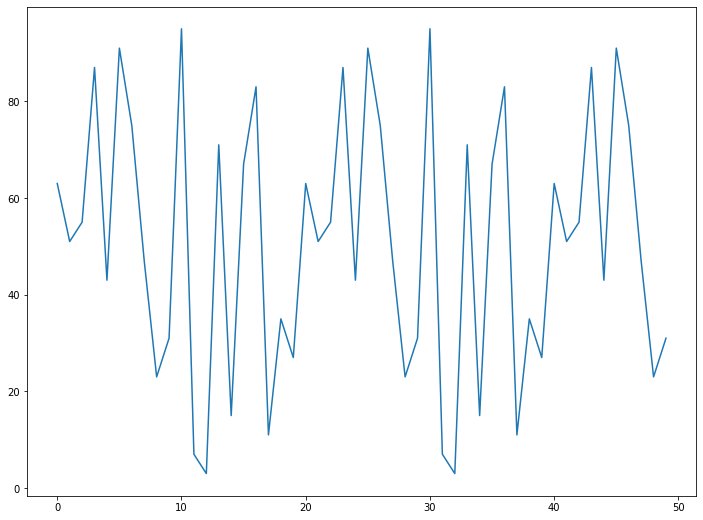

In [ ]:
import matplotlib.pyplot as plt


list_bilAcak = []

def bilanganacak (a, c, m, x):
  for i in range(1,500):
    acak = ((a*x)+c) % m
    x = acak
    list_bilAcak.append(acak)
  
bilanganacak(8,47,100,27)

plt.figure(figsize=(12,9),)
plt.plot(list_bilAcak [0:50])

(array([6., 2., 5., 5., 6., 6., 5., 5., 2., 8.]),
 array([ 3. , 12.2, 21.4, 30.6, 39.8, 49. , 58.2, 67.4, 76.6, 85.8, 95. ]),
 <a list of 10 Patch objects>)

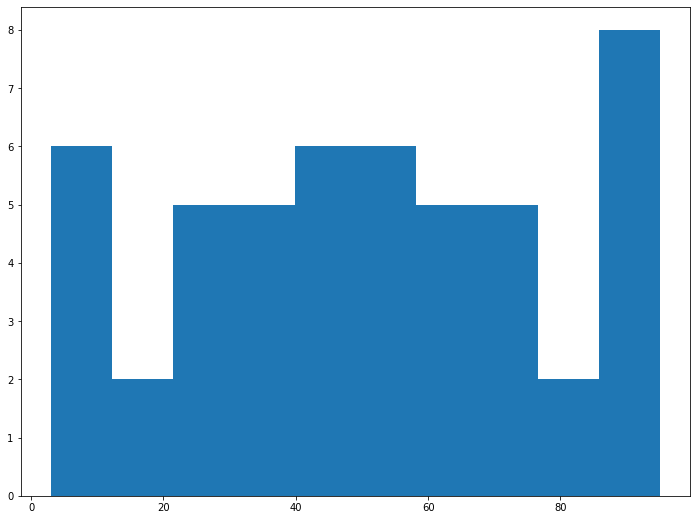

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(list_bilAcak[0:50])

In [ ]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack(list_bilAcak)

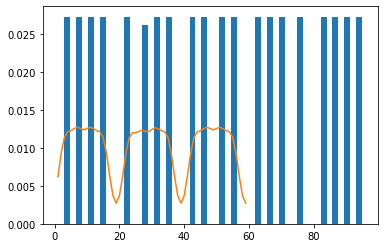

In [ ]:
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

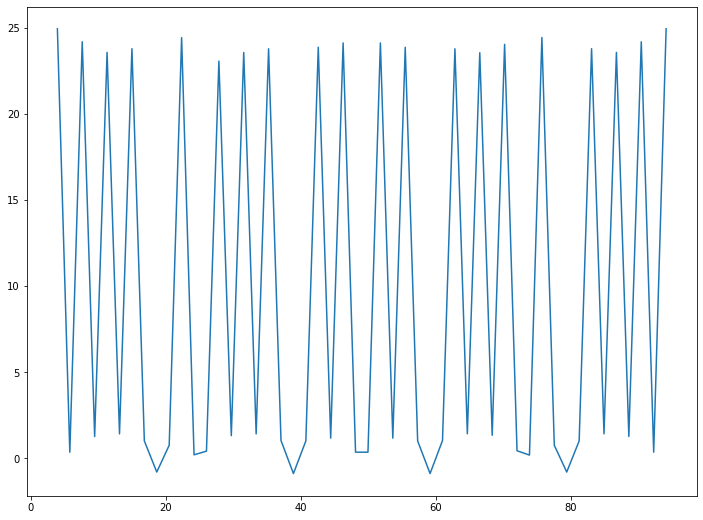

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

new_lis = list_bilAcak
N = 500
n = N//10
s = np.random.normal(size=N)   # generate your data sample with N elements
p, x = np.histogram(new_lis, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)

plt.figure(figsize=(12,9))
plt.plot(x, f(x))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


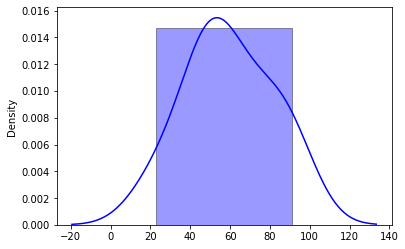

In [ ]:
import seaborn as sns

sns.distplot(list_bilAcak[0:9], hist=True, kde=True, 
             bins=1, color = 'blue',
             hist_kws={'edgecolor':'black'})

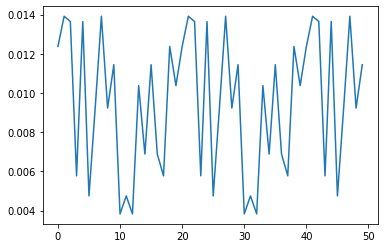

In [ ]:
from math import sqrt, pi, erfc

def normcdf(x, mu, sigma):
    t = x-mu;
    y = 0.5*erfc(-t/(sigma*sqrt(2.0)));
    if y>1.0:
        y = 1.0;
    return y

def normpdf(x, mu, sigma):
    u = (x-mu)/abs(sigma)
    y = (1/(sqrt(2*pi)*abs(sigma)))*exp(-u*u/2)
    return y

def normdist(x, mu, sigma, f):
    if f:
        y = normcdf(x,mu,sigma)
    else:
        y = normpdf(x,mu,sigma)
    return y

PDF = []
CDF = []
for x in list_bilAcak:
  pdf = normdist(x, 49, 28.6, False)
  cdf = normdist(x, 49, 28.6, True)
  PDF.append(pdf)
  CDF.append(cdf)

plt.plot(PDF[0:50])

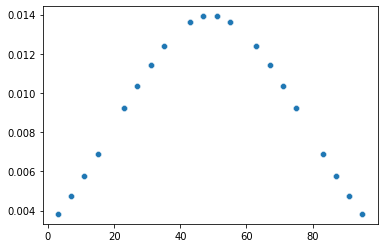

In [ ]:
import seaborn as sns
sns.scatterplot(x=list_bilAcak[0:50], y=PDF[0:50])

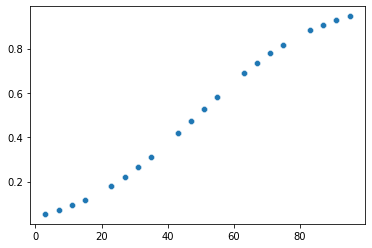

In [ ]:
sns.scatterplot(x=list_bilAcak[0:50], y=CDF[0:50])